 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [5]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [6]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print("Flattened Testing data", x_test)
print("Testing labels", y_test)
print("Flattened Training data", x_train)
print("Training labels", y_train)


Flattened Testing data [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Testing labels [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Flattened Training data [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Training labels [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [7]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)


In [8]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

print(mnist_traindata.shape,mnist_trainlabel.shape)
print(mnist_testdata.shape,mnist_testlabel.shape)

#print(mnist_traindata[0]/255.0)
#print(x_train[0])

a=mnist_traindata[0]/255.0
a=a.reshape(-1,28*28)
b=x_train[0]
print(a.shape)
print(b.shape)
print(a==b)


(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(1, 784)
(784,)
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  T

Epoch 5/20 | Train Loss: 1.4576, Train Acc: 91.93%, Val Loss: 1.5213, Val Acc: 91.65%
Epoch 10/20 | Train Loss: 1.0439, Train Acc: 94.17%, Val Loss: 1.2539, Val Acc: 93.07%
Epoch 15/20 | Train Loss: 0.7808, Train Acc: 95.58%, Val Loss: 1.1517, Val Acc: 93.65%
Epoch 20/20 | Train Loss: 0.5710, Train Acc: 96.71%, Val Loss: 1.0729, Val Acc: 94.07%


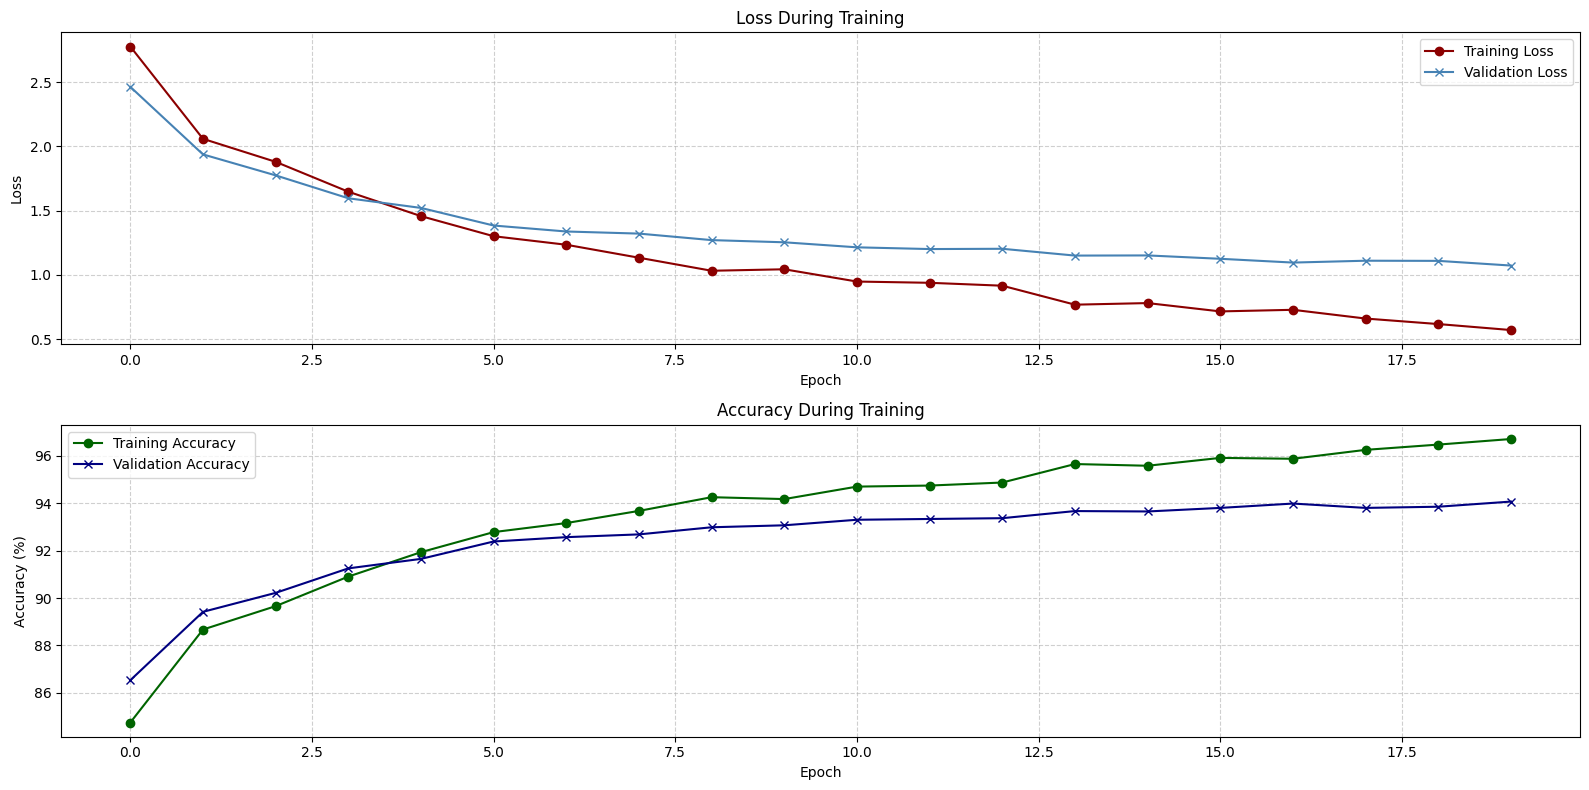

Test Loss: 1.3068, Test Accuracy: 92.76%


In [9]:
##################################################
# Define Activation Functions and Gradients
##################################################

# ReLU activation: outputs input if positive, else 0
def ReLu(inp):
    return np.maximum(0, inp)

# Gradient of ReLU: 1 for positive input, else 0
def gradReLu(inp):
    return np.where(inp > 0, 1, 0)

# Softmax activation for output layer (multi-class classification)
def softmax(inp):
    z = inp
    sub = np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z - sub)  # for numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Generic activation function dispatcher
def activation_func(inp, name):
    name = name.lower()
    if name == 'sigmoid':
        return np.where(inp >= 0, 1 / (1 + np.exp(-inp)), np.exp(inp) / (1 + np.exp(inp)))
    elif name == 'tanh':
        return np.tanh(inp)
    elif name == 'relu':
        return np.maximum(0, inp)
    elif name == 'softmax':
        sub = np.max(inp, axis=1, keepdims=True)
        exp_z = np.exp(inp - sub)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    elif name == 'leakyrelu':
        return np.where(inp > 0, inp, 0.01 * inp)
    elif name == 'linear':
        return inp
    elif name == 'softplus':
        return np.where(inp > 20, inp, np.log1p(np.exp(inp)))
    else:
        raise ValueError(f"Unknown activation function: {name}")

# Gradients for each supported activation
def activation_func_grad(inp, name):
    name = name.lower()
    if name == 'sigmoid':
        sigma = activation_func(inp, 'sigmoid')
        return sigma * (1 - sigma)
    elif name == 'tanh':
        return 1 - np.tanh(inp) ** 2
    elif name == 'relu':
        return np.where(inp > 0, 1, 0)
    elif name == 'leakyrelu':
        return np.where(inp > 0, 1, 0.01)
    elif name == 'linear':
        return np.ones_like(inp)
    elif name == 'softplus':
        return np.where(inp >= 0, 1 / (1 + np.exp(-inp)), np.exp(inp) / (1 + np.exp(inp)))
    else:
        raise ValueError(f"Unknown activation function gradient: {name}")


##################################################
# Forward and Backward Propagation Functions
##################################################

def fwdPropagate(inputs, weights, names=['ReLu', 'ReLu', 'Softmax']):
    W1, W2, W3 = weights
    act1, act2, act3 = names

    a1 = np.dot(inputs, W1)
    z1 = activation_func(a1, act1)
    a2 = np.dot(z1, W2)
    z2 = activation_func(a2, act2)
    a3 = np.dot(z2, W3)
    out = activation_func(a3, act3)
    return [a1, z1, a2, z2, a3, out]

def computeGradients(inputs, targets, weights, activations, names=['ReLu', 'ReLu', 'Softmax']):
    W1, W2, W3 = weights
    a1, z1, a2, z2, a3, outps = activations
    act1, act2, _ = names
    m = targets.shape[0]

    d_a3 = (outps - targets) / m
    dj_dw3 = np.dot(z2.T, d_a3)

    d_z2 = np.dot(d_a3, W3.T)
    d_a2 = d_z2 * activation_func_grad(a2, act2)
    dj_dw2 = np.dot(z1.T, d_a2)

    d_z1 = np.dot(d_a2, W2.T)
    d_a1 = d_z1 * activation_func_grad(a1, act1)
    dj_dw1 = np.dot(inputs.T, d_a1)

    return [dj_dw1, dj_dw2, dj_dw3]

def applyGradients(weights, gradients, learning_rate):
    W1, W2, W3 = weights
    dW1, dW2, dW3 = gradients
    return [W1 - learning_rate * dW1, W2 - learning_rate * dW2, W3 - learning_rate * dW3]

def backPropagate(inputs, targets, weights, activations, learning_rate, names=['ReLu', 'ReLu', 'Softmax']):
    gradients = computeGradients(inputs, targets, weights, activations, names)
    return applyGradients(weights, gradients, learning_rate)


##################################################
# Training Function
##################################################

def training(inputs, targets_idx, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001, names=['ReLu', 'ReLu', 'Softmax'], print_it='print'):
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(np.ceil((n_samples * train_val_split) / batch_size))

    # One-hot encoding if necessary
    if targets_idx.ndim == 1:
        targets_idx = targets_idx.astype(int)
        targets_onehot = np.zeros((n_samples, n_classes))
        targets_onehot[np.arange(n_samples), targets_idx] = 1
    else:
        targets_onehot = targets_idx

    split_idx = int(train_val_split * n_samples)
    x_train, y_train = inputs[:split_idx], targets_onehot[:split_idx]
    x_val, y_val = inputs[split_idx:], targets_onehot[split_idx:]

    W1 = np.random.randn(inputs.shape[1], hidden_units)
    W2 = np.random.randn(hidden_units, hidden_units)
    W3 = np.random.randn(hidden_units, n_classes)
    weights = [W1, W2, W3]

    tr_err, tr_acc, val_err, val_acc = [], [], [], []

    for epoch in range(epochs):
        indices = np.random.permutation(x_train.shape[0])
        x_train, y_train = x_train[indices], y_train[indices]

        for batch in range(n_batches):
            start = batch * batch_size
            end = min(start + batch_size, x_train.shape[0])
            x_batch = x_train[start:end]
            y_batch = y_train[start:end]

            activations = fwdPropagate(x_batch, weights, names)
            weights = backPropagate(x_batch, y_batch, weights, activations, learning_rate, names)

        # Evaluate on train/validation sets
        train_out = fwdPropagate(x_train, weights, names)[-1]
        val_out = fwdPropagate(x_val, weights, names)[-1]

        train_pred = np.argmax(train_out, axis=1)
        val_pred = np.argmax(val_out, axis=1)
        train_true = np.argmax(y_train, axis=1)
        val_true = np.argmax(y_val, axis=1)

        train_loss = -np.sum(y_train * np.log(train_out + 1e-8)) / y_train.shape[0]
        val_loss = -np.sum(y_val * np.log(val_out + 1e-8)) / y_val.shape[0]

        tr_err.append(train_loss)
        val_err.append(val_loss)
        tr_acc.append(100 * np.mean(train_pred == train_true))
        val_acc.append(100 * np.mean(val_pred == val_true))

        if (epoch + 1) % 5 == 0 and print_it == 'print':
            print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f}, Train Acc: {tr_acc[-1]:.2f}%, "
                  f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc[-1]:.2f}%")

    return tr_err, tr_acc, val_err, val_acc, weights


##################################################
# Visualization
##################################################

tr_err, tr_acc, val_err, val_acc, trained_weights = training(
    x_train, y_train, batch_size=128, epochs=20,
    train_val_split=0.9, learning_rate=0.001,
    names=['ReLu', 'ReLu', 'Softmax'], print_it='print'
)

# Plot results with enhanced color scheme
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Plot Loss
axes[0].plot(tr_err, label='Training Loss', marker='o', color='darkred')
axes[0].plot(val_err, label='Validation Loss', marker='x', color='steelblue')
axes[0].set_title('Loss During Training')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot Accuracy
axes[1].plot(tr_acc, label='Training Accuracy', marker='o', color='darkgreen')
axes[1].plot(val_acc, label='Validation Accuracy', marker='x', color='navy')
axes[1].set_title('Accuracy During Training')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


##################################################
# Evaluate on Test Set
##################################################

test_out = fwdPropagate(x_test, trained_weights, names=['ReLu', 'ReLu', 'Softmax'])[-1]
test_pred = np.argmax(test_out, axis=1)
test_true = np.argmax(y_test, axis=1)
test_acc = 100 * np.mean(test_pred == test_true)
test_loss = -np.sum(y_test * np.log(test_out + 1e-8)) / y_test.shape[0]

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")



**Report on Observations**

- **SGD Algorithm Performance with Predefined Parameters (10 Epochs)**:  
   - After 10 epochs, the network achieves a training accuracy between 85% and 88%.  
   - The validation accuracy ranges from 88% to 92%, with a testing accuracy of approximately 90%.

- **SGD Algorithm Performance with Increased Epochs (20 Epochs)**:  
   - Upon increasing the number of epochs (up to 20), the training accuracy reaches a maximum of 96%, while validation accuracy peaks at 93%.  
   - The testing accuracy stabilizes around 92%.

- **Effect of Hidden Layer Neurons (Around 15 Epochs)**:  
   - With around 15 epochs and hidden layers containing between 50 to 60 neurons, the accuracy remains nearly the same.  
   - This suggests that increasing the number of neurons in the hidden layers may increase the likelihood of overfitting the model to the training data.




<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [10]:
##################################################
# Train the network using different activation functions
##################################################

# Train using sigmoid activation in the first and second hidden layers
*_, trained_weights_sigmoid = training(
    x_train, y_train,
    batch_size=128,
    epochs=20,
    train_val_split=0.9,
    learning_rate=0.001,
    names=['Sigmoid', 'Sigmoid', 'Softmax'],
    print_it='no print'
)
print("Network trained with sigmoid activation function")

# Train using tanh activation in the first and second hidden layers
*_, trained_weights_tanh = training(
    x_train, y_train,
    batch_size=128,
    epochs=20,
    train_val_split=0.9,
    learning_rate=0.001,
    names=['tanh', 'tanh', 'Softmax'],
    print_it='no print'
)
print("Network trained with tanh activation function")


##################################################
# Evaluate the trained models on MNIST test data
##################################################

print("\nEvaluating performance of network trained with sigmoid activation:")

# Perform forward pass using the sigmoid-trained model
test_out = fwdPropagate(x_test, trained_weights_sigmoid, names=['Sigmoid', 'Sigmoid', 'Softmax'])[-1]

# Compute predicted labels from output probabilities
test_pred = np.argmax(test_out, axis=1)

# Get ground truth labels
test_true = np.argmax(y_test, axis=1)

# Calculate accuracy and cross-entropy loss
test_acc = 100 * np.mean(test_pred == test_true)
test_loss = -np.sum(y_test * np.log(test_out + 1e-8)) / y_test.shape[0]
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")


print("\nEvaluating performance of network trained with tanh activation:")

# Perform forward pass using the tanh-trained model
test_out = fwdPropagate(x_test, trained_weights_tanh, names=['tanh', 'tanh', 'Softmax'])[-1]

# Compute predicted labels
test_pred = np.argmax(test_out, axis=1)

# Get ground truth labels
test_true = np.argmax(y_test, axis=1)

# Calculate accuracy and loss
test_acc = 100 * np.mean(test_pred == test_true)
test_loss = -np.sum(y_test * np.log(test_out + 1e-8)) / y_test.shape[0]
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")


Network trained with sigmoid activation function
Network trained with tanh activation function

Evaluating performance of network trained with sigmoid activation:
Test Loss: 2.7900, Test Accuracy: 57.86%

Evaluating performance of network trained with tanh activation:
Test Loss: 4.7444, Test Accuracy: 62.15%


In [11]:
##################################################
# Train the network using leaky ReLU activation function
##################################################

# Train using leaky ReLU activation in the first and second hidden layers
*_, trained_weights_leaky_relu = training(
    x_train, y_train,
    batch_size=128,
    epochs=20,
    train_val_split=0.9,
    learning_rate=0.001,
    names=['leakyReLu', 'leakyReLu', 'Softmax'],
    print_it='print'
)
print("Network trained with leaky ReLU activation function")


##################################################
# Evaluate the leaky ReLU trained model on MNIST test data
##################################################

print("\nEvaluating performance of network trained with leaky ReLU activation:")

# Perform forward pass using the leaky ReLU-trained model
test_out = fwdPropagate(x_test, trained_weights_leaky_relu, names=['leakyReLu', 'leakyReLu', 'Softmax'])[-1]

# Compute predicted labels from the network output
test_pred = np.argmax(test_out, axis=1)

# Get true labels
test_true = np.argmax(y_test, axis=1)

# Calculate classification accuracy and cross-entropy loss
test_acc = 100 * np.mean(test_pred == test_true)
test_loss = -np.sum(y_test * np.log(test_out + 1e-8)) / y_test.shape[0]
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")


Epoch 5/20 | Train Loss: 1.4767, Train Acc: 91.85%, Val Loss: 1.5744, Val Acc: 91.30%
Epoch 10/20 | Train Loss: 0.9791, Train Acc: 94.53%, Val Loss: 1.2421, Val Acc: 93.15%
Epoch 15/20 | Train Loss: 0.8664, Train Acc: 95.15%, Val Loss: 1.1679, Val Acc: 93.57%
Epoch 20/20 | Train Loss: 0.5637, Train Acc: 96.79%, Val Loss: 1.0597, Val Acc: 94.13%
Network trained with leaky ReLU activation function

Evaluating performance of network trained with leaky ReLU activation:
Test Loss: 1.2477, Test Accuracy: 93.09%




**Report on Observations**

- **Comparison of Sigmoid and Tanh Activation Functions**:  
   - When using the sigmoid and tanh functions separately, there is a noticeable difference in test data accuracy (about 1.07 times).  
   - This difference is due to how batches are selected during training, which results in different weight updates.  
   - The accuracy achieved with the **Sigmoid** function is around 58%, while the **Tanh** function provides an accuracy of 62%.

- **Effect of Using Same Batches for Both Activation Functions**:  
   - When the same batches are used for both sigmoid and tanh activations, the accuracy difference becomes more pronounced, with sigmoid yielding lower accuracy than tanh.  
   - The output accuracy for **Sigmoid** is approximately 1.25 times smaller than that of **Tanh** when using the same batches and epochs.  
   - This is expected, as during training, the accuracy for **Sigmoid** is consistently 1.5 times smaller in both training and validation compared to **Tanh**.

- **Vanishing Gradients and Comparison with ReLU and LeakyReLU**:  
   - Due to vanishing gradients in the **Sigmoid** and **Tanh** activation functions, the test data accuracy is lower than that achieved with **ReLU**.  
   - When **LeakyReLU** is used instead of **ReLU**, the accuracy improves. LeakyReLU, being a more relaxed version of ReLU, allows for the existence of negative activations, enhancing the model's performance.  
   - The accuracy achieved with the **LeakyReLU** activation function is 93%.




<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [12]:
##################################################
# Train the network using Adam optimizer
##################################################

def applyDropout(layer_input, dropout_prob=0.2, dropout_training=True):
    """
    Apply dropout to the given layer during training to prevent overfitting.
    """
    if dropout_training:
        mask = np.random.rand(*layer_input.shape) > dropout_prob  # Generate dropout mask
        return layer_input * mask  # Apply mask
    return layer_input  # No dropout during evaluation


def fwdPropagateAdam(inputs, weights, names=['ReLu', 'ReLu', 'Softmax'], dropout_prob=0.2, dropout_training=False):
    """
    Forward propagation using specified activations and dropout.
    """
    W1, W2, W3 = weights
    act1, act2, act3 = names

    # First hidden layer
    a1 = np.dot(inputs, W1)
    z1 = activation_func(a1, act1)
    z1 = applyDropout(z1, dropout_prob, dropout_training)

    # Second hidden layer
    a2 = np.dot(z1, W2)
    z2 = activation_func(a2, act2)
    z2 = applyDropout(z2, dropout_prob, dropout_training)

    # Output layer
    a3 = np.dot(z2, W3)
    out = activation_func(a3, act3)

    return [a1, z1, a2, z2, a3, out]


def applyGradientsAdam(weights, gradients, moments, t, learning_rate, lambda_reg, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update weights using Adam optimization rule.
    """
    updated_weights = []
    updated_moments = []

    for W, g, (m_prev, v_prev) in zip(weights, gradients, moments):
        g += lambda_reg * W  # Add L2 regularization
        m = beta1 * m_prev + (1 - beta1) * g
        v = beta2 * v_prev + (1 - beta2) * (g ** 2)

        # Bias-corrected estimates
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)

        W_update = W - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

        updated_weights.append(W_update)
        updated_moments.append((m, v))

    return updated_weights, updated_moments


def backPropagateAdam(inputs, targets, weights, activations, learning_rate, moments, t, lambda_reg=0.01, names=['leakyReLu', 'leakyReLu', 'Softmax']):
    """
    Perform backpropagation and apply Adam updates.
    """
    gradients = computeGradients(inputs, targets, weights, activations, names)
    weights, moments = applyGradientsAdam(weights, gradients, moments, t, learning_rate, lambda_reg)
    return weights, moments


def trainingAdam(inputs, targets_idx, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001,
                 names=['leakyReLu', 'leakyReLu', 'Softmax'], lambda_reg=0.01, dropout_prob=0.2,
                 dropout_training=False, waiting=5, print_it='print'):
    """
    Train the network using the Adam optimizer.
    """
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    targets_onehot = targets_idx

    # Split into training and validation sets
    split_idx = int(train_val_split * n_samples)
    train_inputs, val_inputs = inputs[:split_idx], inputs[split_idx:]
    train_targets, val_targets = targets_onehot[:split_idx], targets_onehot[split_idx:]
    n_batches = int(np.ceil(train_inputs.shape[0] / batch_size))

    # Weight initialization (He initialization)
    W1 = np.random.randn(inputs.shape[1], hidden_units) * np.sqrt(2. / inputs.shape[1])
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2. / hidden_units)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2. / hidden_units)
    weights = [W1, W2, W3]

    # Initialize first and second moments for Adam
    moments = [(np.zeros_like(W1), np.zeros_like(W1)),
               (np.zeros_like(W2), np.zeros_like(W2)),
               (np.zeros_like(W3), np.zeros_like(W3))]

    t = 1  # timestep
    validation_err = []

    for epoch in range(epochs):
        # Shuffle training data
        indices = np.arange(train_inputs.shape[0])
        np.random.shuffle(indices)
        train_inputs, train_targets = train_inputs[indices], train_targets[indices]

        for batch in range(n_batches):
            start, end = batch * batch_size, min((batch + 1) * batch_size, train_inputs.shape[0])
            x_batch, y_batch = train_inputs[start:end], train_targets[start:end]

            activations = fwdPropagateAdam(x_batch, weights, names, dropout_prob, dropout_training)
            weights, moments = backPropagateAdam(x_batch, y_batch, weights, activations, learning_rate, moments, t, lambda_reg, names)
            t += 1

        # Evaluate training performance
        train_out = fwdPropagate(train_inputs, weights, names)[-1]
        train_pred = np.argmax(train_out, axis=1)
        train_true = np.argmax(train_targets, axis=1)
        train_acc = 100 * np.mean(train_pred == train_true)
        train_loss = -np.sum(train_targets * np.log(train_out + 1e-8)) / train_targets.shape[0]

        # Evaluate validation performance
        val_out = fwdPropagate(val_inputs, weights, names)[-1]
        val_pred = np.argmax(val_out, axis=1)
        val_true = np.argmax(val_targets, axis=1)
        val_acc = 100 * np.mean(val_pred == val_true)
        val_loss = -np.sum(val_targets * np.log(val_out + 1e-8)) / val_targets.shape[0]
        validation_err.append(val_loss)

        # Early stopping check
        if waiting > 0:
            if len(validation_err) == (waiting + 1):
                if validation_err[-1] > np.mean(validation_err[-(waiting + 1):-1]):
                    print(f"Early stopping at epoch {epoch + 1} due to no improvement in validation loss.")
                    break
            elif len(validation_err) > (waiting + 1):
                del validation_err[0]

        if (epoch + 1) % 5 == 0 and print_it.casefold() == 'print':
            print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}% | Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%")


    # Optional: Plotting validation error (commented out)
    """
    plt.plot(validation_err, label='Validation Error', marker='v', color='green')
    plt.title('Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.grid(True, linestyle='--')
    plt.legend()
    """

    return weights


# Train with Adam optimizer and leaky ReLU activations
trained_weights = trainingAdam(x_train, y_train, batch_size=128, epochs=20, train_val_split=0.9,
                               learning_rate=0.001, names=['leakyReLu', 'leakyReLu', 'Softmax'],
                               lambda_reg=0, dropout_prob=0.2, dropout_training=False, waiting=0, print_it='print')
print("Network trained with Adam optimizer under leaky ReLU activation function")


##################################################
# Evaluate the performance of the trained Adam model
##################################################

print("\nEvaluating the performance of network trained with Adam optimizer:")

# Forward pass on test data
test_out = fwdPropagate(x_test, trained_weights, names=['leakyReLu', 'leakyReLu', 'Softmax'])[-1]

# Compute predictions and accuracy
test_pred = np.argmax(test_out, axis=1)
test_true = np.argmax(y_test, axis=1)
test_acc = 100 * np.mean(test_pred == test_true)

# Compute cross-entropy loss
test_loss = -np.sum(y_test * np.log(test_out + 1e-8)) / y_test.shape[0]
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")


Epoch 5/20, Train Loss: 0.0151, Train Accuracy: 99.53% | Validation Loss: 0.0673, Validation Accuracy: 98.12%
Epoch 10/20, Train Loss: 0.0102, Train Accuracy: 99.64% | Validation Loss: 0.0924, Validation Accuracy: 97.88%
Epoch 15/20, Train Loss: 0.0127, Train Accuracy: 99.59% | Validation Loss: 0.1028, Validation Accuracy: 98.02%
Epoch 20/20, Train Loss: 0.0057, Train Accuracy: 99.84% | Validation Loss: 0.0904, Validation Accuracy: 98.45%
Network trained with Adam optimizer under leaky ReLU activation function

Evaluating the performance of network trained with Adam optimizer:
Test Loss: 0.1007, Test Accuracy: 98.14%




**Report on Observations**

- **Summary of the Adam Optimization Algorithm**:  
   - Adam is a stochastic gradient descent (SGD) method that adapts the first and second moments of the gradients.  
   - It is widely used for training deep neural networks due to its computational efficiency and low memory requirements.  
   - Adam is invariant to diagonal rescaling of the gradients, making it more robust in certain settings.  
   - The optimizer is particularly effective for non-stationary objectives, as well as problems with sparse or noisy gradients.

- **Comparison of Adam and SGD Performance**:  
   - Under the same conditions, the accuracy of the network trained using the Adam optimization algorithm is superior to that of SGD.  
   - The training accuracy for Adam is around 99%, with a validation accuracy of approximately 97%.  
   - The testing accuracy for Adam is around 98%.  
   - For SGD, the training accuracy is around 96%, and the validation accuracy is approximately 93%.  
   - The testing accuracy for SGD is around 92%.

- **Training Efficiency**:  
   - The Adam optimizer performs better during each batch of data training compared to SGD.  
   - This is due to the momentum features inherent in Adam, which allow smoother updates to weights and errors.  
   - As a result, the accuracies achieved by Adam are consistently higher than those of SGD.


<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [13]:
##################################################
# Training with weight regularization
##################################################

print("\nTraining the network with weight regularization under Adam's optimizer:")

# Train the network with Adam optimizer and weight regularization (L2 regularization)
trained_weights = trainingAdam(x_train, y_train, batch_size=128, epochs=20, train_val_split=0.9,
                               learning_rate=0.001, names=['leakyReLu', 'leakyReLu', 'Softmax'],
                               lambda_reg=0.01, dropout_prob=0.2, dropout_training=False,
                               waiting=0, print_it='print')

print("\nEvaluating the performance of the network trained with Adam optimizer and weight regularization:")

# Forward pass to calculate the output on the test data
test_out = fwdPropagate(x_test, trained_weights, names=['leakyReLu', 'leakyReLu', 'Softmax'])[-1]

# Predicted labels based on output
test_pred = np.argmax(test_out, axis=1)

# True labels from the test set
test_true = np.argmax(y_test, axis=1)

# Calculate the test accuracy (percentage of correct predictions)
test_acc = 100 * np.mean(test_pred == test_true)

# Compute the test loss using cross-entropy
test_loss = -np.sum(y_test * np.log(test_out + 1e-8)) / y_test.shape[0]

# Print the results
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")



Training the network with weight regularization under Adam's optimizer:
Epoch 5/20, Train Loss: 0.2244, Train Accuracy: 94.45% | Validation Loss: 0.1960, Validation Accuracy: 95.33%
Epoch 10/20, Train Loss: 0.2047, Train Accuracy: 95.01% | Validation Loss: 0.1743, Validation Accuracy: 96.28%
Epoch 15/20, Train Loss: 0.2102, Train Accuracy: 95.01% | Validation Loss: 0.1800, Validation Accuracy: 96.15%
Epoch 20/20, Train Loss: 0.2074, Train Accuracy: 94.95% | Validation Loss: 0.1770, Validation Accuracy: 96.18%

Evaluating the performance of the network trained with Adam optimizer and weight regularization:
Test Loss: 0.2011, Test Accuracy: 95.14%


In [14]:
##################################################
# Training with dropout strategy
##################################################

print("\nTraining the network with dropout under Adam's optimizer:")

# Train the network using Adam optimizer with dropout strategy
# Dropout is applied during training to randomly ignore some of the neurons, preventing overfitting
trained_weights = trainingAdam(x_train, y_train, batch_size=128, epochs=20, train_val_split=0.9,
                               learning_rate=0.001, names=['leakyReLu', 'leakyReLu', 'Softmax'],
                               lambda_reg=0, dropout_prob=0.2, dropout_training=True,
                               waiting=0, print_it='print')

print("\nEvaluating the performance of the network trained with Adam optimizer and dropout:")

# Perform forward propagation using the trained weights
# Compute the network's outputs for the test set
test_out = fwdPropagate(x_test, trained_weights, names=['leakyReLu', 'leakyReLu', 'Softmax'])[-1]

# Find the predicted labels by choosing the class with the highest probability
test_pred = np.argmax(test_out, axis=1)

# Get the true labels from the test set (ground truth)
test_true = np.argmax(y_test, axis=1)

# Calculate the test accuracy as the percentage of correct predictions
test_acc = 100 * np.mean(test_pred == test_true)

# Compute the test loss using cross-entropy formula
# We add a small constant (1e-8) to avoid taking the log of zero
test_loss = -np.sum(y_test * np.log(test_out + 1e-8)) / y_test.shape[0]

# Output the test results
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")



Training the network with dropout under Adam's optimizer:
Epoch 5/20, Train Loss: 0.0234, Train Accuracy: 99.27% | Validation Loss: 0.0903, Validation Accuracy: 98.00%
Epoch 10/20, Train Loss: 0.0104, Train Accuracy: 99.65% | Validation Loss: 0.0948, Validation Accuracy: 98.30%
Epoch 15/20, Train Loss: 0.0078, Train Accuracy: 99.76% | Validation Loss: 0.1130, Validation Accuracy: 98.27%
Epoch 20/20, Train Loss: 0.0089, Train Accuracy: 99.80% | Validation Loss: 0.1385, Validation Accuracy: 98.30%

Evaluating the performance of the network trained with Adam optimizer and dropout:
Test Loss: 0.1310, Test Accuracy: 98.24%


In [15]:
##################################################
# Training with early stopping criterion
##################################################

print("\nTraining the network with early stopping criterion (16 here) under Adam's optimizer:")

# Train the network using Adam optimizer with early stopping criterion
# Early stopping helps prevent overfitting by stopping the training if the validation loss
# does not improve for a set number of epochs (in this case, 15 epochs without improvement)
trained_weights = trainingAdam(x_train, y_train, batch_size=128, epochs=60, train_val_split=0.9,
                               learning_rate=0.001, names=['leakyReLu', 'leakyReLu', 'Softmax'],
                               lambda_reg=0, dropout_prob=0.2, dropout_training=False,
                               waiting=15, print_it='print')

print("\nEvaluating the performance of the network trained with Adam optimizer and early stopping criterion:")

# Perform forward propagation using the trained weights
# Compute the network's outputs for the test set
test_out = fwdPropagate(x_test, trained_weights, names=['leakyReLu', 'leakyReLu', 'Softmax'])[-1]

# Find the predicted labels by choosing the class with the highest probability
test_pred = np.argmax(test_out, axis=1)

# Get the true labels from the test set (ground truth)
test_true = np.argmax(y_test, axis=1)

# Calculate the test accuracy as the percentage of correct predictions
test_acc = 100 * np.mean(test_pred == test_true)

# Compute the test loss using cross-entropy formula
# We add a small constant (1e-8) to avoid taking the log of zero
test_loss = -np.sum(y_test * np.log(test_out + 1e-8)) / y_test.shape[0]

# Output the test results
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")



Training the network with early stopping criterion (16 here) under Adam's optimizer:
Epoch 5/60, Train Loss: 0.0355, Train Accuracy: 98.76% | Validation Loss: 0.1000, Validation Accuracy: 97.52%
Epoch 10/60, Train Loss: 0.0082, Train Accuracy: 99.74% | Validation Loss: 0.0851, Validation Accuracy: 98.02%
Epoch 15/60, Train Loss: 0.0108, Train Accuracy: 99.65% | Validation Loss: 0.0804, Validation Accuracy: 98.20%
Epoch 20/60, Train Loss: 0.0043, Train Accuracy: 99.86% | Validation Loss: 0.0965, Validation Accuracy: 98.17%
Epoch 25/60, Train Loss: 0.0040, Train Accuracy: 99.86% | Validation Loss: 0.1133, Validation Accuracy: 98.10%
Epoch 30/60, Train Loss: 0.0020, Train Accuracy: 99.93% | Validation Loss: 0.1159, Validation Accuracy: 98.40%
Epoch 35/60, Train Loss: 0.0095, Train Accuracy: 99.76% | Validation Loss: 0.1153, Validation Accuracy: 98.13%
Epoch 40/60, Train Loss: 0.0051, Train Accuracy: 99.85% | Validation Loss: 0.1143, Validation Accuracy: 98.38%
Epoch 45/60, Train Loss: 0.

**Report on Observations**

- **Effect of Weight Regularization**:  
   - After applying weight regularization, the accuracy typically increases, but in this case, it does not.  
   - The initial weights were already small, and by preventing further growth, the network may be underfitting, leading to lower accuracy for the weight regularization task.  
   - If the weights had been initialized with larger values, weight regularization would likely have helped in reducing overfitting.  
   - In this case, the accuracy for weight regularization is around 96%.

- **Effect of Dropout Regularization**:  
   - The dropout layer reduces overfitting by randomly deactivating a fraction of the neurons during training.  
   - This forces the network to learn more generalized features and prevents it from over-relying on any single neuron.  
   - The dropout layer is disabled during inference, so all neurons are utilized for prediction.  
   - The accuracy of the network trained with dropout is slightly higher than the original network trained with the Adam optimizer, consistently achieving better performance.  
   - The accuracy for the dropout regularization task is around 98%, which falls within the same range as Adam's optimization but is always equal to or greater than the performance of the standard Adam optimizer.

- **Effect of Early Stopping Criterion**:  
   - Given that the weights were initialized appropriately for the task, the convergence process is smoother.  
   - With an early stopping criterion of waiting for 10 epochs and a total of 30 epochs, the validation error should be minimized at the latest iteration.  
   - If this condition is not met, the early stopping criterion activates, halting the training process.  
   - In this case, the training stops around the 11th epoch due to a lack of improvement in accuracy.  
   - As a result, the final accuracy for the test data is approximately 97% to 98%.



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



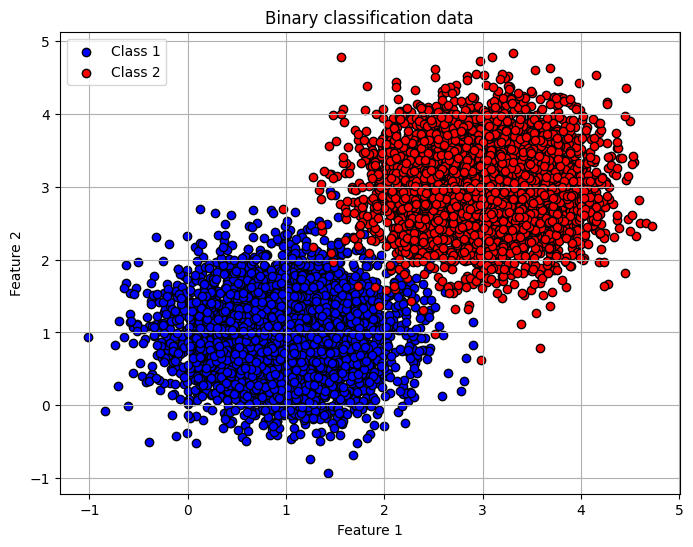

In [34]:
##################################################
#Generating binary classification data (linearly separable)
##################################################

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]

#train data made
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

indices = np.arange((tr_data.shape[0]))
np.random.shuffle(indices)
tr_data = tr_data[indices]
tr_targets = tr_targets[indices]

#test data made
class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

indices = np.arange((te_data.shape[0]))
np.random.shuffle(indices)
te_data = tr_data[indices]
te_targets = tr_targets[indices]



#Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1', edgecolors='k')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_grad(z):
    ret_val = sigmoid(z)
    return ret_val * (1 - ret_val)


def Logistic_Regression(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Predictions on test data

  max_iter = 10_000 #max number of ierations for parameter update

  #threshold chosen empirically
  threshold = 0.5 #threshold for classification
  X_tr = np.hstack((np.ones((X_train.shape[0], 1)), X_train)) #Data. Append ones to the training data to take care of the bias
  X_te = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
  w = np.zeros(X_tr.shape[1]) #Initialize the weight vector

  for _ in range(max_iter):
    preds = sigmoid(X_tr @ w) #Predictions on X. Sigmoid($\vec{w}^{T}\cdot\vec{x}$) our y_n in class
    error = preds - Y_train #Difference between preds and Y_train
    grad = X_tr.T @ error

    #Compute the gradients and the appropriate learning rate. We can use Hessian matrix as learning rate
    R = np.diag(preds * (1 - preds))
    H = X_tr.T @ R @ X_tr

    #Update the weight vector
    # if H turns out to be singular, use psuedo inverse
    try:
        delta_w = np.linalg.inv(H) @ grad
    except np.linalg.LinAlgError:
        delta_w = np.linalg.pinv(H) @ grad

    w -= delta_w

    if np.linalg.norm(delta_w) < 1e-6:  #limit to be chose empirically
      #if w reaches a certain range of ceonvergence criteriom,
      # break the loop by reducing number of iterations
      break

  #Test data predictions
  test_preds = sigmoid(X_te@ w)

  #Compare the predictions with 0, to output the decision
  test_preds = (test_preds>= threshold).astype(int)

  #Return the predicted test labels
  return test_preds, w


Y_pred, w_Logistic = Logistic_Regression(tr_data, tr_targets, te_data)

acc = 100*np.mean(te_targets == Y_pred)
print(f"Accuracy of Logistic Regression on Linearly seperable data: {acc:.2f}%")



Accuracy of Logistic Regression on Linearly seperable data: 99.40%


Epoch 5/30 , Train Loss: 0.1084, Train Accuracy: 72.0000 , Validation Loss: 0.0966, Validation Accuracy: 72.1111
Epoch 10/30 , Train Loss: 0.1067, Train Accuracy: 72.5309 , Validation Loss: 0.0959, Validation Accuracy: 72.5556
Epoch 15/30 , Train Loss: 0.1373, Train Accuracy: 73.1358 , Validation Loss: 0.1222, Validation Accuracy: 73.2222
Epoch 20/30 , Train Loss: 0.1539, Train Accuracy: 73.0247 , Validation Loss: 0.1334, Validation Accuracy: 73.5556
Epoch 25/30 , Train Loss: 0.1353, Train Accuracy: 72.7778 , Validation Loss: 0.1168, Validation Accuracy: 72.8889
Epoch 30/30 , Train Loss: 0.1163, Train Accuracy: 72.4321 , Validation Loss: 0.1005, Validation Accuracy: 72.3333
network now trained with Adam optimizer for linearly separable data


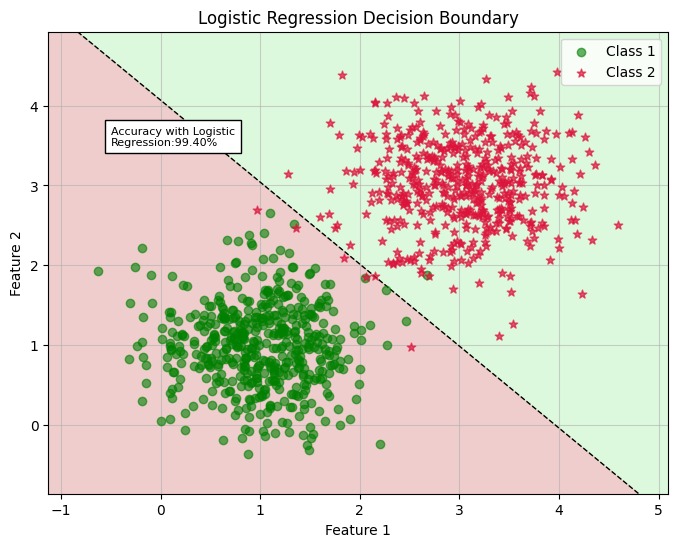

Test Loss: 404.2007, Test Accuracy: 71.90%


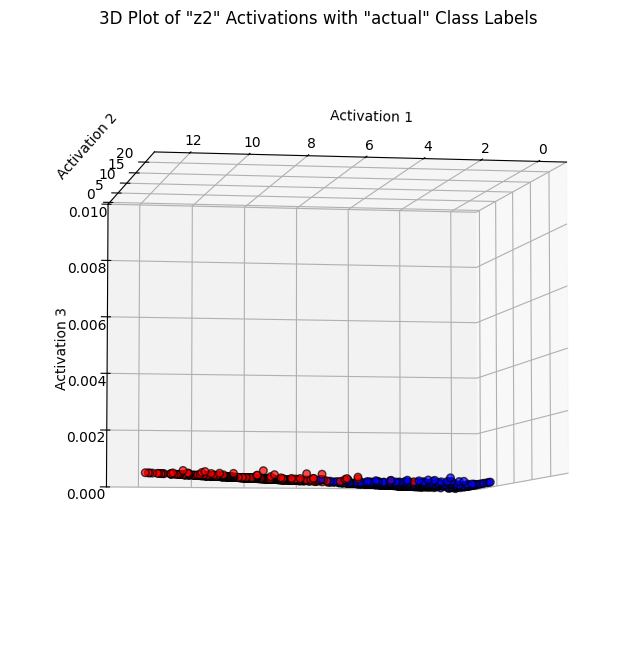

In [39]:
##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################
def ReLu(x):
  return np.maximum(0, x)
def gradReLu(x):
  return np.where(x > 0, 1, 0)

def fwdPropagateNew(inputs, weights,):# names = ['ReLu', 'ReLu', 'Softmax']):
  # Inputs: input data, parameters of network
  W1, W2, W3 = weights


  # First hidden layer with ReLU activation
  a1 = np.dot(inputs, W1)
  z1 = ReLu(a1)

  # Second hidden layer with ReLU activation
  a2 = np.dot(z1, W2)
  z2 = ReLu(a2)

  # Third hidden layer with softmax activation
  a3 = np.dot(z2, W3)
  outps = sigmoid(a3)  # Softmax applied to the output

  # Return the required outputs, i.e., final output and intermediate activations
  return [a1, z1, a2, z2, a3, outps]

def computeGradientsNew(inputs, targets, weights, activations, names = ['ReLu', 'ReLu', 'Softmax']):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
    W1, W2, W3 = weights
    a1, z1, a2, z2, a3, outps = activations

    m = targets.shape[0]  # Number of samples

    # Compute loss (cross-entropy with softmax)
    """
    # cross-entropy loss calculated as requested , but isn't used in backpropagation since the errors are calculated in the function
    # training and the gradients are calculated indepentent of this loss value (seen after derivation of gradients for this loss function
    # [in class it was linear regression and here it's multiclass classification but the gradients are same (error * input of previous layer)])
    loss = -np.sum(targets * np.log(outps + 1e-8)) / m  # Numerical stability
    """

    # Gradient of loss w.r.t. output (softmax + cross-entropy)
    d_a3 = (outps - targets) / m  # (batch, 1)

    # Gradients for W3
    dj_dw3 = np.dot(z2.T, d_a3)  # (3, 1)

    # Backprop to layer 2
    d_z2 = np.dot(d_a3, W3.T)  # (batch, 3)

    d_a2 = d_z2 * gradReLu(a2)
    #d_a2 = d_z2 * gradReLu(a2)  # Apply ReLU derivative

    dj_dw2 = np.dot(z1.T, d_a2)  # (3, 3)

    # Backprop to layer 1
    d_z1 = np.dot(d_a2, W2.T)  # (batch, 3)

    d_a1 = d_z1 * gradReLu(a1)
    #d_a1 = d_z1 * gradReLu(a1)  # Apply ReLU derivative

    dj_dw1 = np.dot(inputs.T, d_a1)  # (2, 3)

    return [dj_dw1, dj_dw2, dj_dw3] #, loss

def applyGradientsAdamNew(weights, gradients, moments, t, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8):
    updated_weights = []
    updated_moments = []

    for W, g, (m_prev, v_prev) in zip(weights, gradients, moments):
        m = beta1 * m_prev + (1 - beta1) * g
        v = beta2 * v_prev + (1 - beta2) * (g ** 2)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        W_update = W - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

        updated_weights.append(W_update)
        updated_moments.append((m, v))

    return updated_weights, updated_moments

def backPropagateAdamNew(inputs, targets,weights, activations, learning_rate, moments, t, names = ['leakyReLu', 'leakyReLu', 'Sigmoid']):

    gradients = computeGradientsNew(inputs, targets, weights, activations, names)

    weights, moments = applyGradientsAdamNew(weights, gradients, moments, t, learning_rate,beta1=0.9, beta2=0.999, epsilon=1e-8,)

    return weights, moments


def glorot_normal(shape):
    fan_in, fan_out = shape[0], shape[1]
    std = np.sqrt(2.0 / (fan_in + fan_out))
    return np.random.normal(0.0, std, size=shape)

def trainingAdamNew(inputs, targets_idx, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001, names = ['ReLu', 'ReLu', 'Sigmoid'], print_it = 'print'):
    hidden_units = 3
    n_classes = 1
    n_samples = inputs.shape[0]


    targets_onehot = targets_idx.reshape(-1,1)

    # Train-validation split
    split_index = int(train_val_split * n_samples)
    train_inputs = inputs[:split_index]
    train_targets = targets_onehot[:split_index]
    val_inputs = inputs[split_index:]
    val_targets = targets_onehot[split_index:]

    n_batches = int(np.ceil(train_inputs.shape[0] / batch_size))

    # Weight initialization
    W1 = np.random.randn(inputs.shape[1], hidden_units) * np.sqrt(2. / (inputs.shape[1]))
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2. / (hidden_units))
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2. / (hidden_units))
    weights = [W1, W2, W3]

    # Adam moments
    moments = [(np.zeros_like(W1), np.zeros_like(W1)),
               (np.zeros_like(W2), np.zeros_like(W2)),
               (np.zeros_like(W3), np.zeros_like(W3))]

    t = 1  # timestep for Adam

    for epoch in range(epochs):
        # Shuffle training data

        """
        permutation = np.random.permutation(train_inputs.shape[0])
        train_inputs = train_inputs[permutation]
        train_targets = train_targets[permutation]
        """

        indices = np.arange(train_inputs.shape[0])
        np.random.shuffle(indices)
        train_inputs = train_inputs[indices]
        train_targets = train_targets[indices]

        for batch in range(n_batches):
            start = batch * batch_size
            end = min(start + batch_size, train_inputs.shape[0])
            x_batch = train_inputs[start:end]
            y_batch = train_targets[start:end]
            activations = fwdPropagateNew(x_batch, weights,)
            weights,moments = backPropagateAdamNew(x_batch, y_batch, weights, activations, learning_rate, moments, t, names)
            t += 1

        # Train accuracy
        train_outputs = (fwdPropagateNew(train_inputs, weights))[-1]
        train_preds = np.where((train_outputs.reshape(-1)) >=0.5, 1, 0)
        train_true = train_targets.reshape(-1)
        train_accuracy =100* np.mean(train_preds == train_true)
        train_loss = -np.sum(train_targets * np.log(train_outputs + 1e-8)) / train_targets.shape[0]

        # Validation accuracy
        val_outputs = fwdPropagateNew(val_inputs, weights)[-1]
        val_preds = np.where((val_outputs.reshape(-1)) >= 0.5, 1, 0)
        val_true = val_targets.reshape(-1)
        val_accuracy =100* np.mean(val_preds == val_true)
        val_loss = -np.sum(val_targets * np.log(val_outputs + 1e-8)) / val_targets.shape[0]
        if (epoch +1 ) % 5 == 0 and print_it.casefold()== 'print':
            print(f"Epoch {epoch+1}/{epochs} , Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f} , Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
    return weights

trained_weights = trainingAdamNew(tr_data, tr_targets, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.01, names = ['ReLu', 'ReLu', 'Sigmoid'],print_it = 'print')
print("network now trained with Adam optimizer for linearly separable data")


##################################################
#Compare the performance of both the models on linearly separable data
##################################################

# logistic regression

acc = 100*np.mean(te_targets == Y_pred)

x_min, x_max = te_data[:, 0].min() - 0.5, te_data[:, 0].max() + 0.5
y_min, y_max = te_data[:, 1].min() - 0.5, te_data[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
X_grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
Z = sigmoid(X_grid @ w_Logistic)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[-np.inf, 0.5, np.inf], colors=['indianred','lightgreen'], alpha=0.3, zorder= 1)
plt.contour(xx, yy, Z, levels=[0, 0.5, 1], colors="black",linestyles = '--', linewidths=1, zorder = 2)
plt.scatter(te_data[te_targets == 0][:, 0], te_data[te_targets == 0][:, 1],alpha = 0.6,color='green', label='Class 1', zorder = 4)
plt.scatter(te_data[te_targets == 1][:, 0], te_data[te_targets == 1][:, 1],alpha= 0.7,s= 40, marker='*', color='crimson', label='Class 2', zorder = 5)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.text(-0.5, 3.5, f'Accuracy with Logistic\nRegression:{acc:.2f}%',fontsize=8, bbox=dict(facecolor='white', alpha=1.0), zorder = 6)
plt.grid(alpha=0.6, zorder = 3)
plt.legend()
plt.show()

# print("\nEvaluating the performance of network trained with Adam optimizer : ")

#Compute outputs on test data
_, _, _, z2, _, test_out = (fwdPropagateNew(te_data, trained_weights,))

#Compute test accuracy, and test error
test_pred = np.where((test_out.reshape(-1)) >=0.5, 1, 0) #np.max(test_out, axis=1)
te_true = te_targets.reshape(-1, 1)
test_true = np.where((te_true.reshape(-1)) >=0.5, 1, 0) #np.max(te_targets, axis=1)
test_acc = 100* np.mean(test_pred == test_true)
test_loss = -np.sum(te_targets * np.log(test_out + 1e-8)) / te_targets.shape[0]
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

# Plot the 2nd layer activation potentials in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red' if label == 1 else 'blue' for label in test_true]
ax.scatter(z2[:, 0], z2[:, 1], z2[:, 2], c=colors, alpha=0.7, s=30, edgecolors='k')
ax.set_title('3D Plot of "z2" Activations with "actual" Class Labels')
ax.set_xlabel('Activation 1')
ax.set_ylabel('Activation 2')
ax.set_zlabel('Activation 3')
ax.set_xlim(-1, np.max(z2[:, 0]) + 0.01)
ax.set_ylim(-1, np.max(z2[:, 1]) + 0.01)
ax.set_zlim(np.min(z2[:, 2]), np.max(z2[:, 2]) + 0.01)
ax.view_init(elev=-5, azim=80)
plt.show()



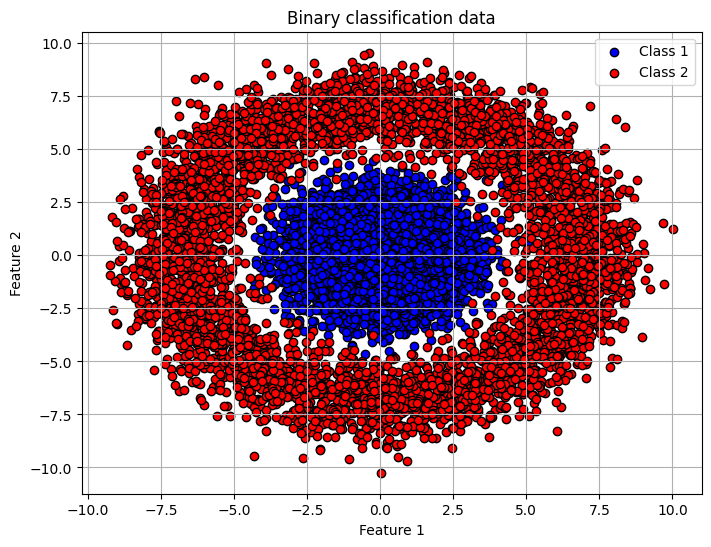

In [29]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 5000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

#take 90% of data for training and 10% for testing from each class and then combine
train_size = int(0.9 * n_samples)

class1_train = class1_data[:train_size]
class2_train = class2_data[:train_size]
x_train = np.concatenate((class1_train, class2_train), axis=0)
y_train = np.concatenate((np.zeros(train_size), np.ones(train_size)), axis=0)

class1_test = class1_data[train_size:]
class2_test = class2_data[train_size:]
x_test = np.concatenate((class1_test, class2_test), axis=0)
y_test = np.concatenate((np.zeros(n_samples - train_size), np.ones(n_samples - train_size)), axis=0)

# Plot the data
plt.figure(figsize=(8, 6))
plt.grid(True)
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1', edgecolors='k')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.show()



Accuracy of Logistic Regression on Non-linearly seperable data: 50.60%
Epoch 5/30 , Train Loss: 0.2184, Train Accuracy: 44.4444 , Validation Loss: 0.5000, Validation Accuracy: 100.0000
Epoch 10/30 , Train Loss: 0.1960, Train Accuracy: 44.4444 , Validation Loss: 0.4532, Validation Accuracy: 100.0000
Epoch 15/30 , Train Loss: 0.1847, Train Accuracy: 44.4444 , Validation Loss: 0.4250, Validation Accuracy: 100.0000
Epoch 20/30 , Train Loss: 0.1552, Train Accuracy: 44.4444 , Validation Loss: 0.3518, Validation Accuracy: 100.0000
Epoch 25/30 , Train Loss: 0.1209, Train Accuracy: 44.4444 , Validation Loss: 0.2700, Validation Accuracy: 100.0000
Epoch 30/30 , Train Loss: 0.1136, Train Accuracy: 44.4444 , Validation Loss: 0.2535, Validation Accuracy: 100.0000
network trained with Adam optimizer


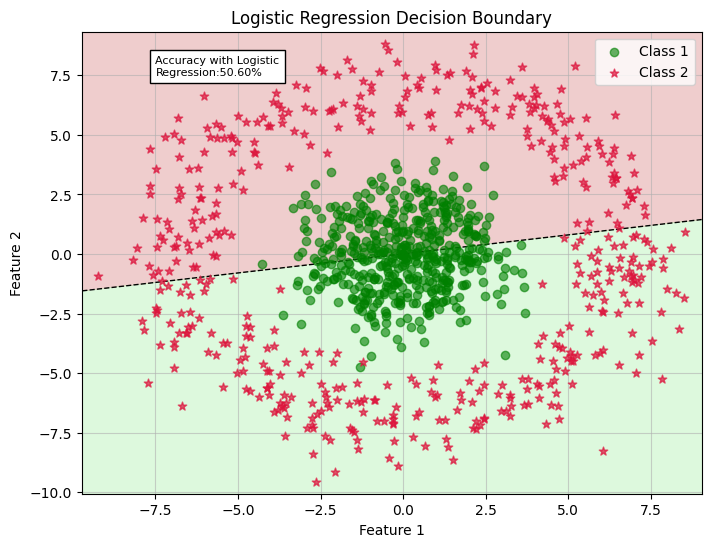


Evaluating the performance of network trained with Adam optimizer : 
Test Loss: 198.3383, Test Accuracy: 50.00%


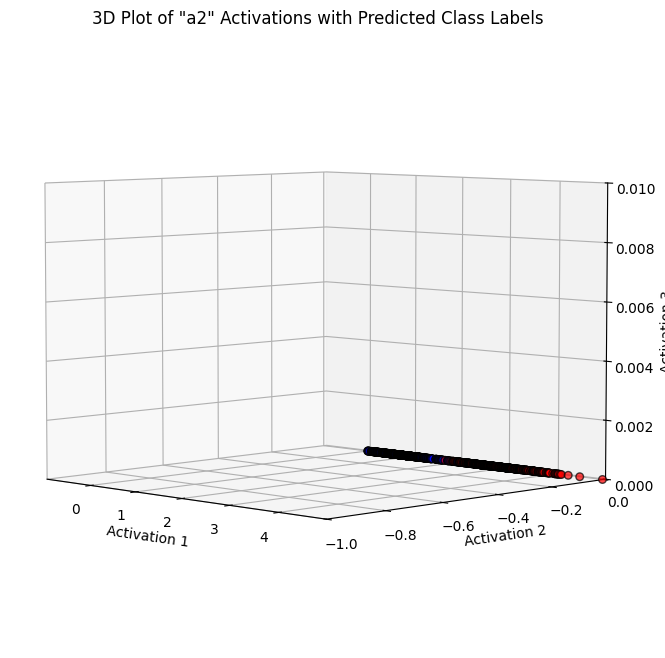

In [30]:
##################################################
#Classify the non-linearly separable data using linear classification models
##################################################

Y_pred, w_Logistic = Logistic_Regression(x_train, y_train, x_test)
acc = 100*np.mean(y_test == Y_pred)
print(f"Accuracy of Logistic Regression on Non-linearly seperable data: {acc:.2f}%")


##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################

trained_weights = trainingAdamNew(x_train, y_train, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001, names = ['ReLu', 'Relu', 'Sigmoid'],print_it = 'print')
print("network trained with Adam optimizer")

##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################

#For logistic regression
x_min, x_max = x_test[:, 0].min() - 0.5, x_test[:, 0].max() + 0.5
y_min, y_max = x_test[:, 1].min() - 0.5, x_test[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
X_grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
Z = sigmoid(X_grid @ w_Logistic)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[-np.inf, 0.5, np.inf], colors=['indianred','lightgreen'], alpha=0.3, zorder= 1)
plt.contour(xx, yy, Z, levels=[0, 0.5, 1], colors="black",linestyles = '--', linewidths=1, zorder = 2)
plt.scatter(x_test[y_test == 0][:, 0], x_test[y_test == 0][:, 1],alpha = 0.6,color='green', label='Class 1', zorder = 4)
plt.scatter(x_test[y_test == 1][:, 0], x_test[y_test == 1][:, 1],alpha= 0.7,s= 40, marker='*', color='crimson', label='Class 2', zorder = 5)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.text(-7.5, 7.5, f'Accuracy with Logistic\nRegression:{acc:.2f}%',fontsize=8, bbox=dict(facecolor='white', alpha=1.0), zorder = 6)
plt.grid(alpha=0.6, zorder = 3)
plt.legend()
plt.show()

# for DNN (not so deep ofcourse)
print("\nEvaluating the performance of network trained with Adam optimizer : ")

#Compute outputs on test data
_, _, _, z2, _, test_out = (fwdPropagateNew(x_test, trained_weights,))
#Compute test accuracy, and test error
test_pred = np.where((test_out.reshape(-1)) >=0.5, 1, 0) #np.max(test_out, axis=1)
te_true = y_test.reshape(-1, 1)
test_true = np.where((te_true.reshape(-1)) >=0.5, 1, 0) #np.max(te_targets, axis=1)
test_acc = 100* np.mean(test_pred == test_true)
test_loss = -np.sum(y_test * np.log(test_out + 1e-8)) / y_test.shape[0]
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

# Plot the 2nd layer activation potentials in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red' if label == 1 else 'blue' for label in test_true]
ax.scatter(z2[:, 0], z2[:, 1], z2[:, 2], c=colors, alpha=0.7, s=30, edgecolors='k')
ax.set_title('3D Plot of "a2" Activations with Predicted Class Labels')
ax.set_xlabel('Activation 1')
ax.set_ylabel('Activation 2')
ax.set_zlabel('Activation 3')
ax.set_xlim(-1+ np.min(z2[:, 0]), np.max(z2[:, 0]) + 0.01)
ax.set_ylim(-1+ np.min(z2[:, 1]), np.max(z2[:, 1]) + 0.01)
ax.set_zlim(np.min(z2[:, 2]), np.max(z2[:, 2]) + 0.01)
ax.view_init(elev=5, azim=-45)
plt.show()




**Report on Observations**

- **Performance of Linear Classifier on Linearly Separable Data**:  
   - As anticipated, the linear classifier performs well on the linearly separable data, achieving an accuracy of approximately 99% using Logistic Regression.  
   - However, the same Logistic Regression model underperforms on non-linearly separable data, with an accuracy of around 50%.  
   - This outcome is expected, as the decision boundary of a linear classifier is a straight line, whereas the decision boundary for a non-linear classifier is a non-linear curve.

- **Performance of DNN Classifier on Linearly Separable Data**:  
   - The DNN-based classification model doesn't perform well on either linearly separable or non-linearly separable data.  
   - For linearly separable data, the accuracy ranges between 50% and 75%, typically hovering around 70%.  
   - This is primarily due to the ReLU activation function used in the model, which suppresses negative activations, resulting in incorrect classification of class 2 labels.

- **Performance of DNN Classifier on Non-Linearly Separable Data**:  
   - When the DNN model is applied to non-linearly separable data, the accuracy is approximately 50%, which is expected due to the choice of activation function.



